<img width="800px" src="../fidle/img/header.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> Low level implementation of a solution by gradient descent. Basic and stochastic approach.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import and init


In [2]:
import numpy as np
import sys

import fidle

from modules.RegressionCooker import RegressionCooker 

# Init Fidle environment
#
run_id, run_dir, datasets_dir = fidle.init('GRAD1')

# ---- Instanciate a Regression Cooker
#
cooker = RegressionCooker(fidle)

<br>**FIDLE - Environment initialization**

Version              : 2.3.2
Run id               : GRAD1
Run dir              : ./run/GRAD1
Datasets dir         : /data/datasets-fidle
Start time           : 02/07/24 14:50:51
Hostname             : ebf2030c9b9e (Linux)
Tensorflow log level : Info + Warning + Error  (=0)
Update keras cache   : False
Update torch cache   : False
Save figs            : ./run/GRAD1/figs (False)
numpy                : 1.26.4
sklearn              : 1.4.1.post1
yaml                 : 6.0.1
matplotlib           : 3.8.3
pandas               : 2.2.1


<br>**FIDLE 2020 - Regression Cooker**

Version      : 0.1
Run time     : Tuesday 02 July 2024, 14:50:51


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


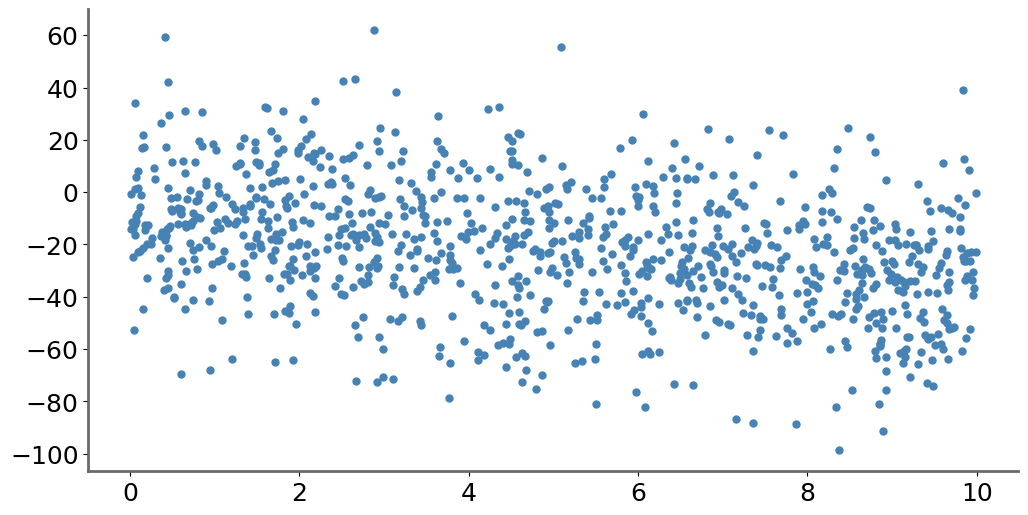

X                :      mean=   5.001  std=   2.886    min=   0.000    max=  10.000
Y                :      mean= -20.987  std=  24.568    min=-134.095    max= 109.856


In [3]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [4]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   5.001  std=   2.886    min=   0.000    max=  10.000
X normalized     :      mean=  -0.000  std=   1.000    min=  -1.733    max=   1.732


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +22.196   -9.208  +0.705   -4.512  -0.007
   20  +10.378   -6.147  +0.471   -3.012  -0.122
   40   +5.111   -4.104  +0.314   -2.011  -0.199
   60   +2.763   -2.740  +0.210   -1.343  -0.250
   80   +1.717   -1.829  +0.140   -0.896  -0.284
  100   +1.251   -1.221  +0.094   -0.598  -0.307
  120   +1.043   -0.815  +0.062   -0.399  -0.322
  140   +0.950   -0.544  +0.042   -0.267  -0.332
  160   +0.909   -0.363  +0.028   -0.178  -0.339
  180   +0.890   -0.243  +0.019   -0.119  -0.344
  200   +0.882   -0.162  +0.012   -0.079  -0.347


<br>**Visualization :**

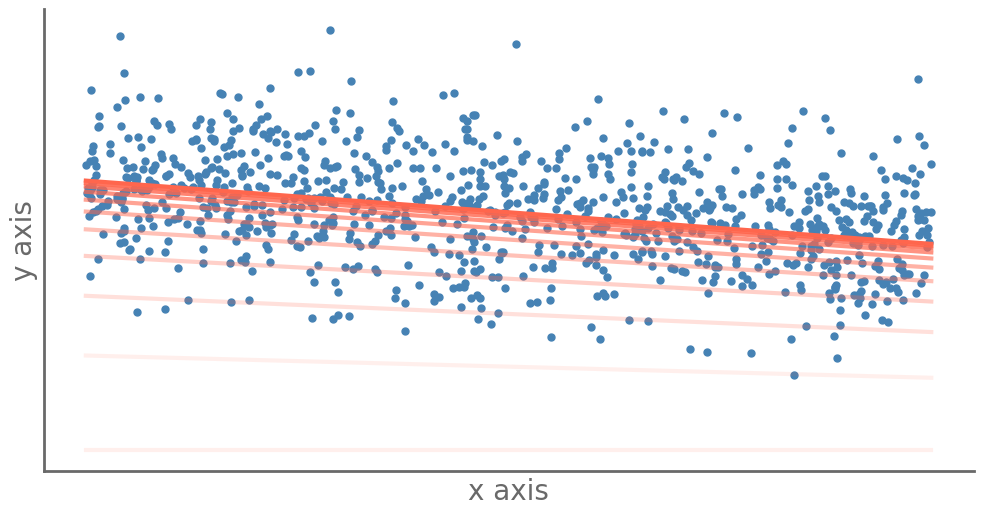

<br>**Loss :**

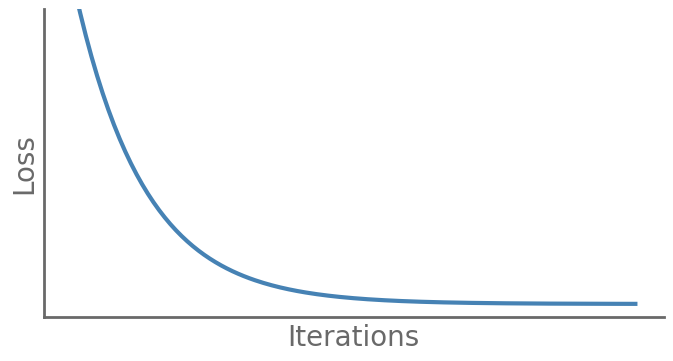

In [29]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.783   -7.054  -2.224   -0.087  -0.378
    1   +0.624   +1.035  +0.752   -0.097  -0.332
    2   +0.596   +1.071  +7.082   -0.169  -0.419
    3   +0.466   -3.005  +4.097   -0.078  -0.406
    4   +0.728   +2.258 +13.591   +0.020  -0.382
    5   +0.838   +0.470  +1.975   +0.012  -0.324
    6   +0.676   -7.379  -3.314   +0.016  -0.312
    7   +1.278   -4.585  +6.231   +0.004  -0.309
    8   +0.871   -7.784 +10.426   +0.020  -0.319
    9   +0.920  +11.868  +4.571   +0.003  -0.324


<br>**Visualization :**

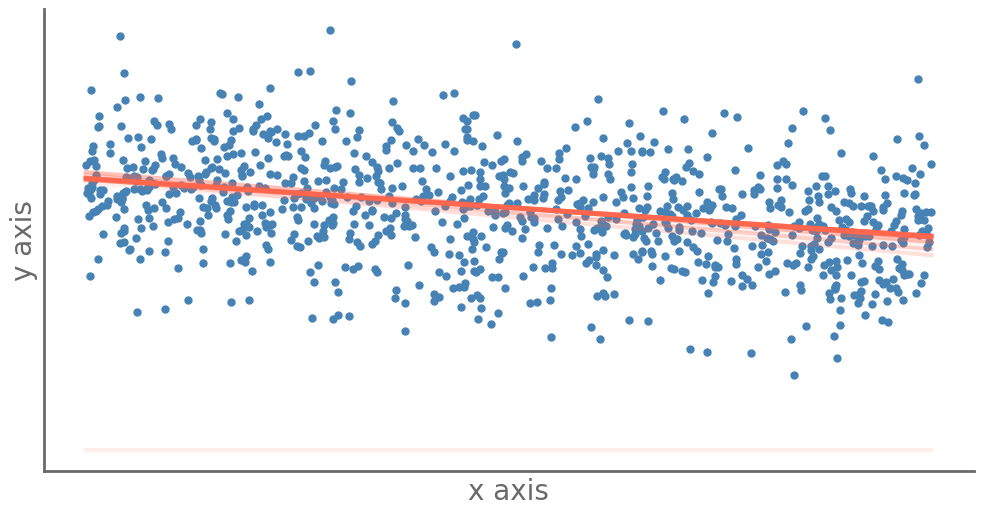

<br>**Loss :**

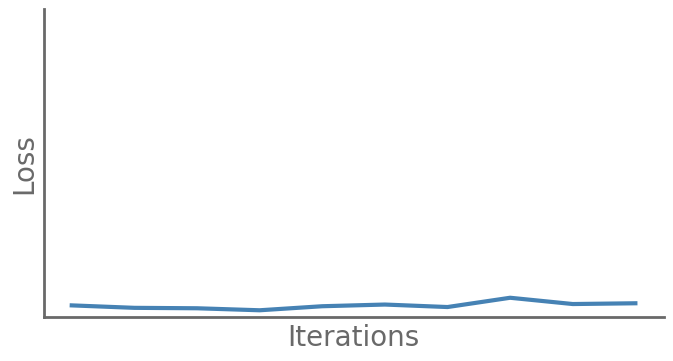

In [34]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [ ]:
fidle.end()

---
<img width="80px" src="../fidle/img/logo-paysage.svg"></img>